# PHP 1880 Stress Survey

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

### Clean and Reverse Code

In [2]:
survey = pd.read_csv('survey.csv',  header=[1])

In [3]:
survey.drop('end.comments', axis=1, inplace=True)

In [4]:
survey.dropna(inplace=True)

In [5]:
# PSS Reverse Score Items 4, 5, 6, 7, 9, 10, 13

pss_reverse = ['PS1_4', 'PS1_5', 'PS1_6', 'PS1_7', 'PS1_9', 'PS1_10', 'PS1_13']

survey[pss_reverse] = survey[pss_reverse].replace({0:4, 1:3, 2:2, 3:1, 4:0})

In [6]:
# FFMQ Reverse Score Items 3, 5, 8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 30, 34, 35, 38, 39

ffmq_reverse = ['FF1_3', 'FF1_5', 'FF1_8', 'FF1_10', 'FF1_12', 'FF1_13', 'FF1_14','FF1_16', 'FF1_17', 'FF1_18', 
                'FF1_22', 'FF1_23','FF1_25', 'FF1_28', 'FF1_30', 'FF1_34', 'FF1_35','FF1_38', 'FF1_39']


survey[ffmq_reverse] = survey[ffmq_reverse].replace({1:5, 2:4, 3:3, 4:2, 5:1})

In [7]:
pss_filter = [col for col in survey if col.startswith('PS1')]
ffmq_filter = [col for col in survey if col.startswith('FF1')]

### Split Pre/Post Survey and Run Analysis

In [8]:
pre = survey.loc[survey.timepoint == 'pre']
post = survey.loc[survey.timepoint == 'post']

In [9]:
pre = pre.loc[pre.email.isin(post.email)]
post = post.loc[post.email.isin(pre.email)]

In [10]:
pre['PSS Total'] = pre[pss_filter].sum(axis=1)

post['PSS Total'] = post[pss_filter].sum(axis=1

In [11]:
pre['FFMQ Total'] = pre[ffmq_filter].sum(axis=1)

post['FFMQ Total'] = post[ffmq_filter].sum(axis=1)

In [12]:
ffmq_observing = {'FF1_1', 'FF1_6', 'FF1_11', 'FF1_15', 'FF1_20', 'FF1_26', 'FF1_31', 'FF1_36'}

ffmq_describing = {'FF1_2', 'FF1_7', 'FF1_12', 'FF1_16', 'FF1_22', 'FF1_27', 'FF1_32', 'FF1_37'}

ffmq_acting = {'FF1_5', 'FF1_8', 'FF1_13', 'FF1_18', 'FF1_23', 'FF1_28', 'FF1_34', 'FF1_38'}

ffmq_nonjudging = {'FF1_3', 'FF1_10', 'FF1_14', 'FF1_17', 'FF1_25', 'FF1_30', 'FF1_35', 'FF1_39'}

ffmq_nonreactivity = {'FF1_4', 'FF1_9', 'FF1_19', 'FF1_21', 'FF1_24', 'FF1_29', 'FF1_33'}

pre['FFMQ Total Observing'] = pre[ffmq_observing].sum(axis=1)
pre['FFMQ Total Describing'] = pre[ffmq_describing].sum(axis=1)
pre['FFMQ Total Acting'] = pre[ffmq_acting].sum(axis=1)
pre['FFMQ Total Nonjudging'] = pre[ffmq_nonjudging].sum(axis=1)
pre['FFMQ Total Nonreactivity'] = pre[ffmq_nonreactivity].sum(axis=1)

post['FFMQ Total Observing'] = post[ffmq_observing].sum(axis=1)
post['FFMQ Total Describing'] = post[ffmq_describing].sum(axis=1)
post['FFMQ Total Acting'] = post[ffmq_acting].sum(axis=1)
post['FFMQ Total Nonjudging'] = post[ffmq_nonjudging].sum(axis=1)
post['FFMQ Total Nonreactivity'] = post[ffmq_nonreactivity].sum(axis=1)

In [13]:
#PSS T Test

ttest_ind(pre['PSS Total'], post['PSS Total'])

Ttest_indResult(statistic=2.765054586345926, pvalue=0.008419148155208247)

In [14]:
#FFMQ T Test

ttest_ind(pre['FFMQ Total'], post['FFMQ Total'])

Ttest_indResult(statistic=-4.200598832834693, pvalue=0.0001356269355117862)

In [15]:
#FFMQ T Test Observing

ttest_ind(pre['FFMQ Total Observing'], post['FFMQ Total Observing'])

Ttest_indResult(statistic=-2.6251858717908165, pvalue=0.012027825848477)

In [16]:
#FFMQ T Test Describing

ttest_ind(pre['FFMQ Total Describing'], post['FFMQ Total Describing'])

Ttest_indResult(statistic=-0.7849472160468476, pvalue=0.4368899569925091)

In [17]:
#FFMQ T Test Acting

ttest_ind(pre['FFMQ Total Acting'], post['FFMQ Total Acting'])

Ttest_indResult(statistic=-2.8111776891544924, pvalue=0.007468858836413346)

In [18]:
#FFMQ T Test Nonjudging

ttest_ind(pre['FFMQ Total Nonjudging'], post['FFMQ Total Nonjudging'])

Ttest_indResult(statistic=-3.379800069563163, pvalue=0.0015765792980896487)

In [19]:
#FFMQ T Test Nonreactivity

ttest_ind(pre['FFMQ Total Nonreactivity'], post['FFMQ Total Nonreactivity'])

Ttest_indResult(statistic=-4.179351759791881, pvalue=0.00014486762726801313)

In [20]:
pre.NPS_1 = pre.NPS_1.round()
post.NPS_1 = post.NPS_1.round()

In [21]:
nsp_dict = {
    range(9,11) : 'Promoters',
    range(0,7) : 'Detractors'
}

In [22]:
nps_pre_defined = pre.replace({'NPS_1': nsp_dict})
nps_post_defined = post.replace({'NPS_1': nsp_dict})

In [23]:
#NPS Pre Test

((nps_pre_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_pre_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

-4.545454545454543

In [24]:
#NPS Post Test

((nps_post_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_post_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

45.45454545454546

In [25]:
#NPS Pre Values

nps_pre_defined['NPS_1'].value_counts()

8.0           9
Detractors    6
Promoters     5
7.0           2
Name: NPS_1, dtype: int64

In [26]:
#NPS Post Values

nps_post_defined['NPS_1'].value_counts()

Promoters     13
8.0            5
Detractors     3
7.0            1
Name: NPS_1, dtype: int64

NameError: name 'melt_pss' is not defined

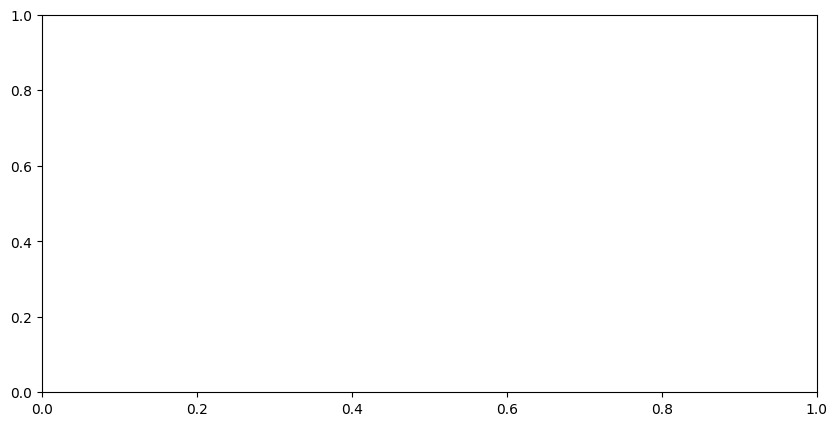

In [27]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=melt_pss,
    x="variable",
    y="value",
    color='darkblue',
    ci=None,
    hue='Timepoint')
ax.set(xlabel = "Question", ylabel = "Score")
ax.set(title= "PSS Pre-Post Survey")
plt.xticks(rotation=90)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=melt_ffmq,
    x="variable",
    y="value",
    color='darkblue',
    #err_style='bars',
    ci=None,
    hue='Timepoint')
ax.set(xlabel = "Question", ylabel = "Score")
ax.set(title= "FFMQ Pre-Post Survey")
plt.xticks(rotation=90)

In [ ]:
survey_raw.NPS_1

In [ ]:
pre.NPS_1['Promoters'].count() / pre.Finished.count()

In [ ]:
test=[]

for x in pss_filter + ffmq_filter:
    test.append(stats.ttest_ind(pre[x], post[x], equal_var=False))

test

In [ ]:
melt_pss = survey.melt(id_vars = 'timepoint', value_vars = pss_filter)
melt_ffmq = survey.melt(id_vars = 'timepoint', value_vars = ffmq_filter)
